<a href="https://colab.research.google.com/github/HariPrasad6221/DDP/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Data_Approximate.xlsx')
x = dataset.iloc[:,2:7].values
y = dataset.iloc[:,10].values
y

array([22, 21, 20, 20, 19, 18, 18, 18, 17, 19, 19, 18, 18, 16, 16, 15, 15,
       14, 13, 12, 12, 12, 11, 11, 10, 10,  9])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])], remainder = 'passthrough')
x= np.array(ct.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import time
from sklearn import tree
begin = time.time()
regression = RandomForestRegressor(n_estimators=100)
regression.fit(x_train,y_train)
end = time.time()
print('Score on specific dataset:')
print(r2_score(y_test,regression.predict(x_test)))
scores = cross_val_score(estimator = regression, X=x_train,y=y_train,cv=4,scoring = 'r2')
print('Average score:')
print(scores.mean())
x_test;
print(f'Run Time: {(end-begin)*1000} ms')
y_test, regression.predict(x_test)

Score on specific dataset:
0.9643519756838906
Average score:
0.8743393556733539
Run Time: 94.03729438781738 ms


(array([11, 12, 19, 11, 16, 16]),
 array([10.69, 12.02, 20.11, 10.44, 16.38, 15.59]))

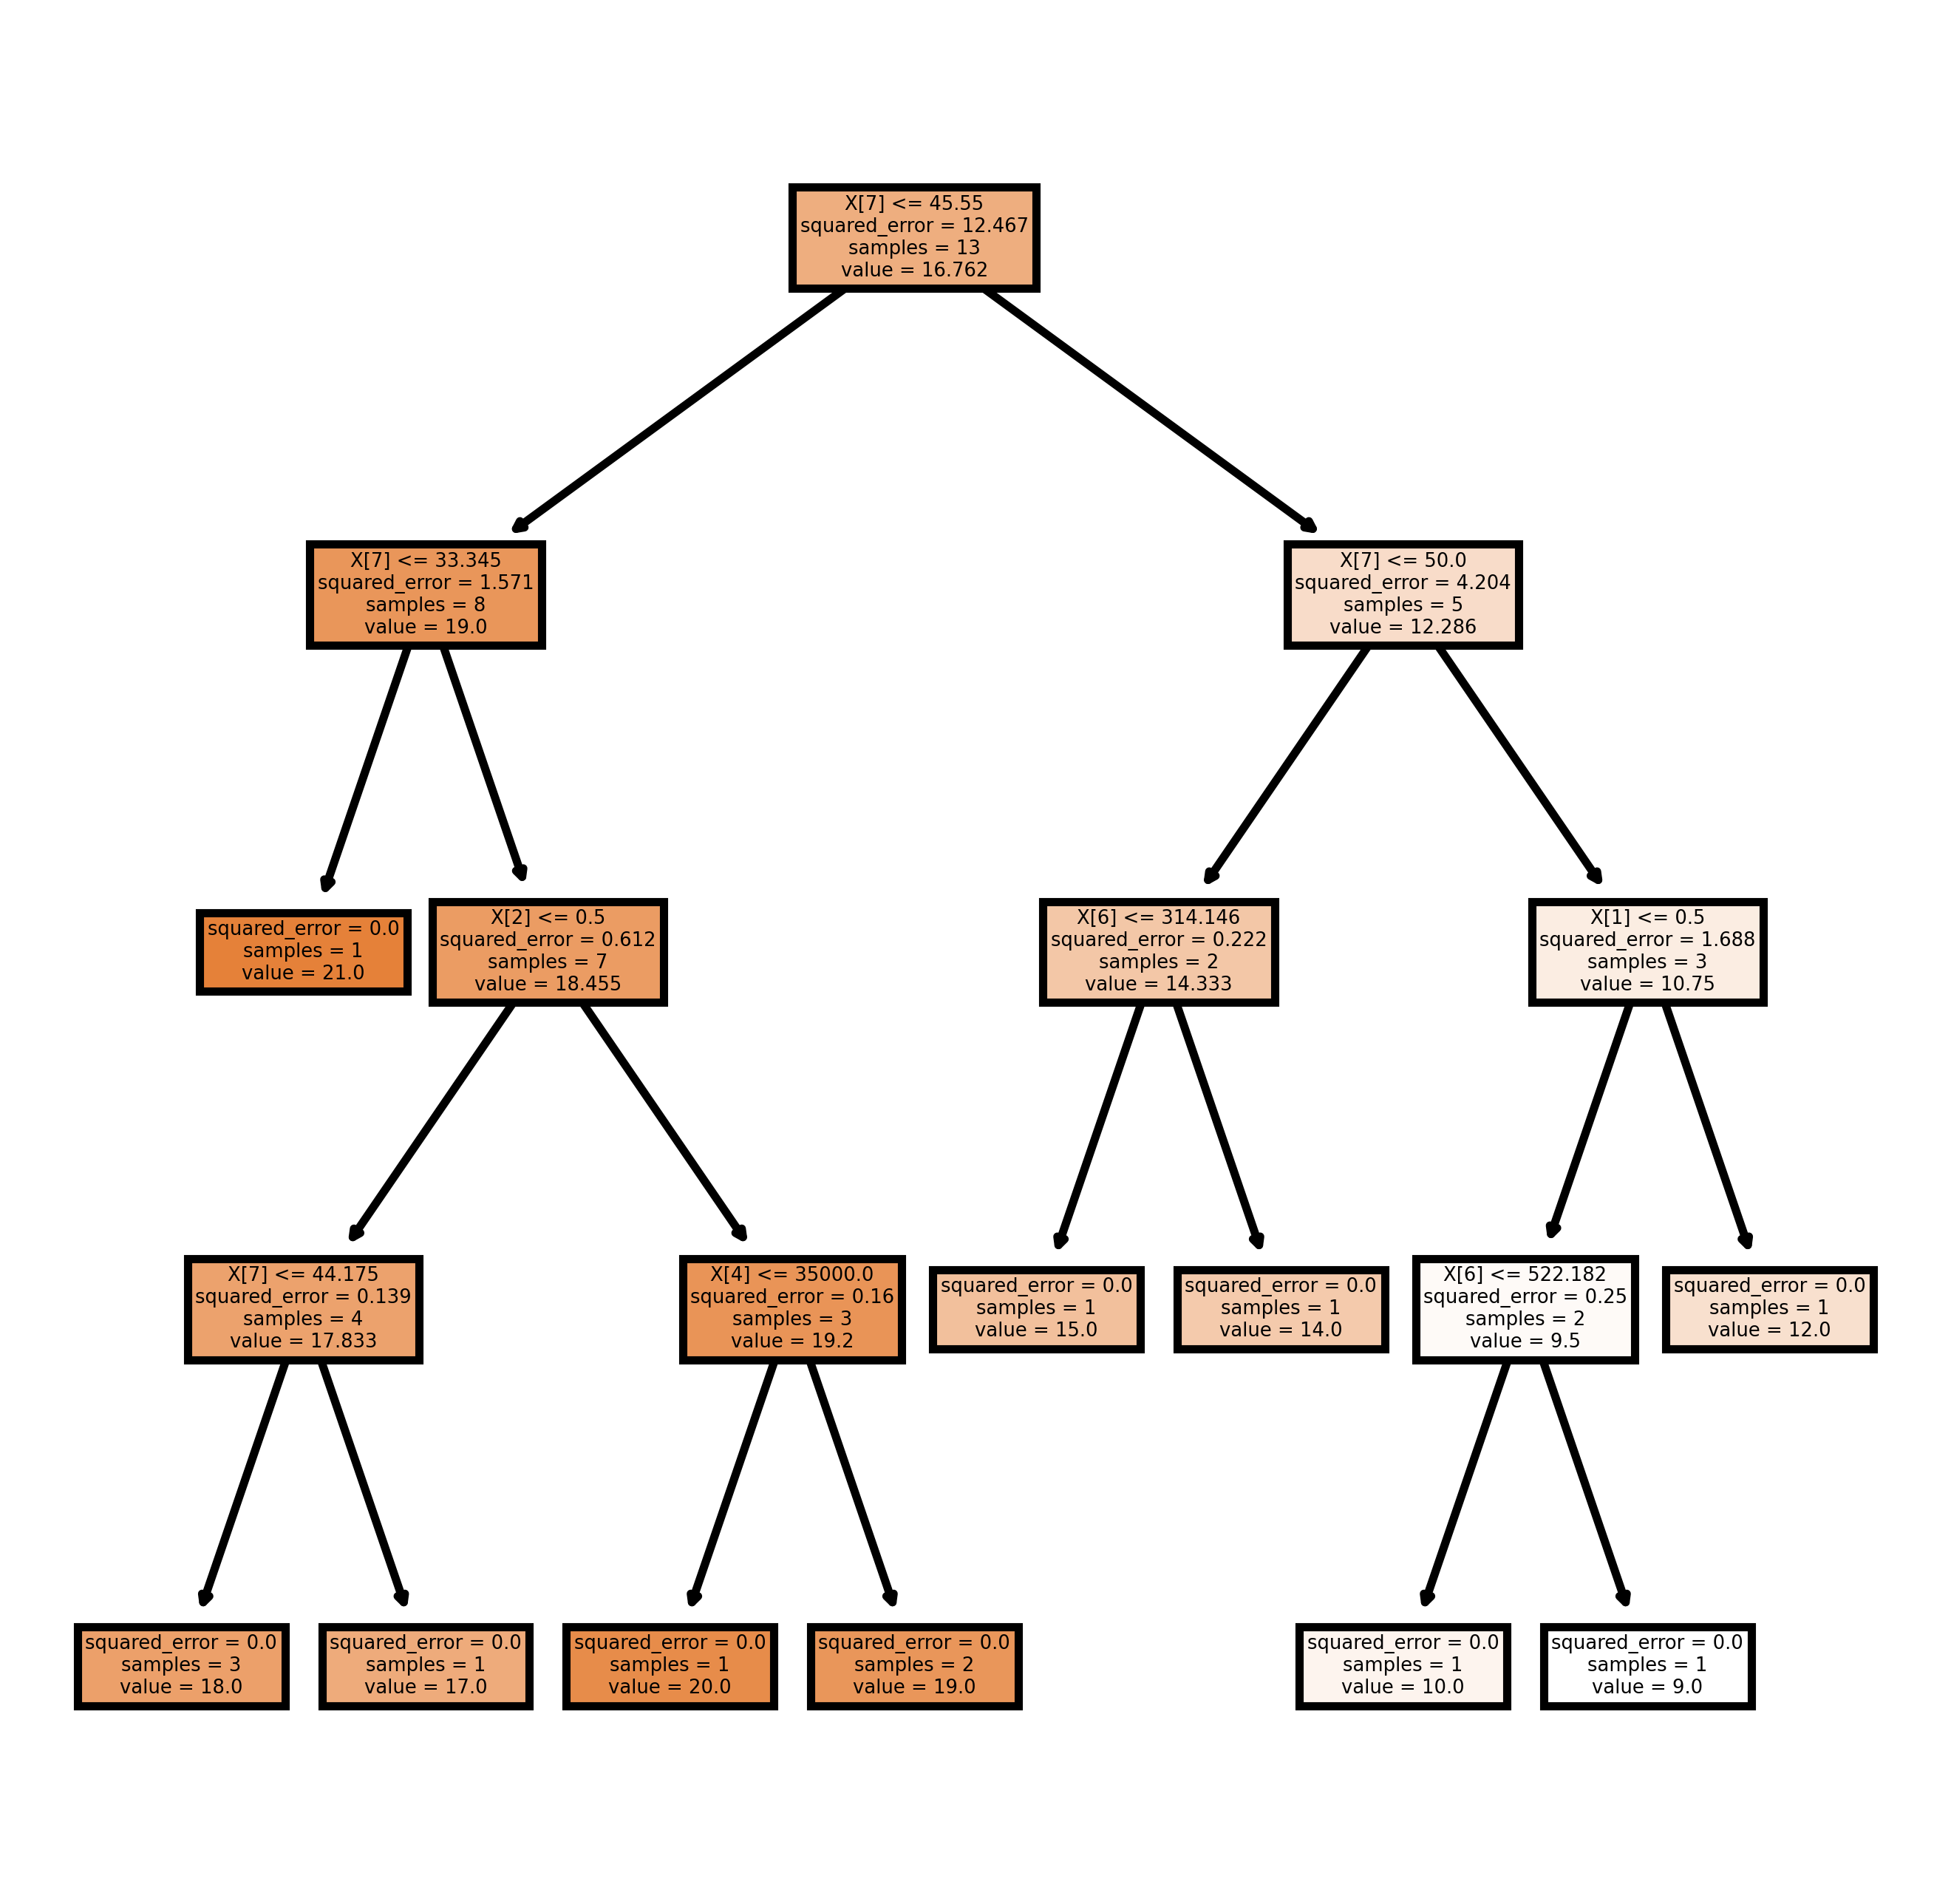

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(regression.estimators_[0],filled = True);